# PROJET IA for HumanForYou - Entraînement et Évaluation du Modèle

|Auteur|
|---|
|G. DUBOYS DE LAVIGERIE|
|T. VILLETTE|
|O. BOUSSARD|
|A. BRICON|

## Objectifs du Notebook

Ce notebook a pour objectif de développer plusieurs modèles d'IA en utilisant les données prétraitées et de les évaluer sur un ensemble de test. Les étapes comprennent :

1. **Division des données :** Séparation des données en ensembles d'entraînement et de test.
2. **Entraînement des modèles :** Développement de plusieurs modèles d'IA avec les données d'entraînement.
3. **Évaluation des modèles :** Mesure des performances de chaque modèle sur l'ensemble de test.
4. **Sélection du meilleur modèle :** Analyse des résultats pour choisir le modèle offrant les performances les plus prometteuses.

## Attendus

À la fin de ce notebook, le modèle sera prêt à être déployé, accompagné d'une évaluation détaillée de ses performances.

## Prérequis

Avant d'exécuter ce notebook, assurez-vous d'avoir exécuté le notebook `data_preprocessing.ipynb` pour garantir que les données sont prêtes pour l'entraînement du modèle.

### Préparation de l'environnement

In [176]:
# Compatibilité entre Python 2 et Python 3
from __future__ import division, print_function, unicode_literals

# Imports nécessaires
import numpy as np
import os

# Assurer la stabilité du notebook entre différentes exécutions
np.random.seed(42)

# Affichage de figures directement dans le notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Ajustements des paramètres de l'affichage des figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignorer les avertissements inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Importation des données traitées réalisée dans le notebook `data_preprocessing.ipynb`

In [177]:
import pandas as pd
pd.set_option('display.max_columns', None) # Retirer la limite de colonnes à afficher

def load_preprocessed_data(file_path='../datasets/data_preprocessing.csv'):
    return pd.read_csv(file_path)

# Charger les données prétraitées
result = load_preprocessed_data()
result.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel,Attrition,MedianWorkingTime
0,0.252200,1.156302,-1.085336,0.379672,-0.426230,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,0.590048,-0.438422,-0.226421
1,0.252200,-0.663899,1.757749,-1.026167,2.346151,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.913194,2.280906,0.013492
2,-0.665460,-0.663899,-2.506879,0.379672,-0.426230,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.913194,-0.438422,-0.535768
3,1.169861,1.156302,0.336206,-1.026167,-0.426230,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-2.416437,-0.438422,-0.388711
4,1.169861,-1.573999,0.336206,0.379672,-0.426230,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,0.590048,-0.438422,0.196198


### Division des données (jeu d'entraînement, jeu de test)
Cette étape consiste à séparer les données en un jeu d'entraînement (80%) et un jeu de test (20%) afin d'évaluer la capacité du modèle à généraliser sur de nouvelles données. 

- Le **jeu d'entraînement** est utilisé pour former le modèle, lui fournissant une quantité suffisante de données pour apprendre les motifs et les relations présents dans nos données.

- Le **jeu de test** permet de mesurer la performance du modèle sur des données non vues pendant l'entraînement, offrant ainsi une évaluation impartiale de sa capacité de généralisation.

Le choix de la division 80/20 n'est pas arbitraire. Il s'agit d'une règle empirique bien établie dans le domaine de l'apprentissage machine, offrant un équilibre optimal entre la taille de l'ensemble d'entraînement nécessaire pour un apprentissage efficace et la capacité à évaluer le modèle de manière significative sur le jeu de test.


In [178]:
from sklearn.model_selection import train_test_split

# Supposons que nous voulons prédire 'cat_nom__Attrition_Yes'
y = result['Attrition']
X = result.drop(['Attrition'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


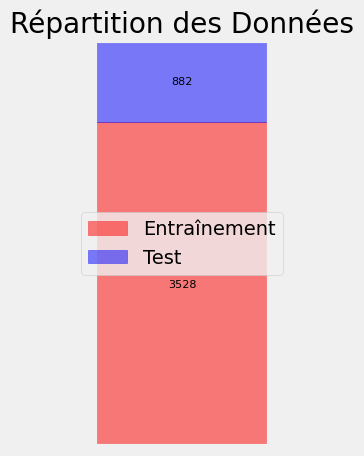

In [179]:
# Affichage d'un graphique
fig, ax = plt.subplots(figsize=(2, 5))

rect_train = plt.Rectangle((0, 0), 1, 0.8, color='red', alpha=0.5, label='Entraînement')
rect_test = plt.Rectangle((0, 0.8), 1, 0.2, color='blue', alpha=0.5, label='Test')

ax.add_patch(rect_train)
ax.add_patch(rect_test)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Répartition des Données")

ax.text(0.5, 0.4, f'{len(X_train)}', ha='center', va='center', color='black', fontsize=8)
ax.text(0.5, 0.9, f'{len(X_test)}', ha='center', va='center', color='black', fontsize=8)

ax.legend(loc='center')

plt.show()


### Choisir et Entraîner un modèle

Avant de plonger dans les détails, il est essentiel de comprendre comment choisir, entraîner et évaluer un modèle. Une étape cruciale consiste à analyser les performances du modèle sur un ensemble de test et à utiliser des techniques comme la validation croisée pour garantir une évaluation robuste du modèle.

**Fonction de validation croisée**

La fonction `train_evaluate_model` ci-dessous illustre un processus générique d'entraînement et d'évaluation de modèles de régression. Cela garantit une approche standardisée dans notre notebook, simplifiant ainsi le processus et assurant une cohérence d'évaluation, indépendamment de l'algorithme sous-jacent.

En utilisant la fonction `train_evaluate_model`, nous appliquons la validation croisée avec deux métriques :
- **RMSE (Root Mean Square Error)** : Mesure la moyenne des erreurs au carré entre prédictions et valeurs réelles, avec prise de la racine carrée de cette moyenne.
- **MAE (Mean Absolute Error)** : Autre métrique mesurant la moyenne des valeurs absolues des erreurs entre prédictions et valeurs réelles.

Cette approche renforce l'évaluation des modèles en utilisant `scikit-learn` pour calculer le RMSE, la MAE, et la validation croisée, fournissant une évaluation complète de la performance du modèle.

Il convient de noter que nous utilisons cette fonction pour chacun de nos modèles, assurant ainsi une comparaison équitable des performances entre les différentes approches algorithmiques que nous explorons.

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def train_model(trainer):
    # Entraînement du modèle
    trainer.fit(X_train, y_train)
    
    some_data = X_train.iloc[:5]
    some_labels = y_train.iloc[:5]

    # Et on effectue la prédiction :
    print("Predictions:", trainer.predict(some_data))
    print("Labels:", list(some_labels)) # vraies valeurs

    # Prédictions sur les données de test
    trainer_predictions = trainer.predict(X_test)
    # Évaluation des prédictions sur les données de test
    trainer_mse = mean_squared_error(y_test, trainer_predictions)
    trainer_rmse = np.sqrt(trainer_mse)

    # Affichage des métriques d'évaluation
    print("MSE:", trainer_mse)
    print("RMSE:", trainer_rmse)

    # Validation croisée pour évaluer la performance du modèle
    scores = cross_val_score(trainer, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
    trainer_rmse_scores = np.sqrt(-scores)

    # Affichage des scores de validation croisée
    print("Cross-Validation Scores:", trainer_rmse_scores)

    # Affichage de la performance moyenne et de la variabilité du modèle
    print("Mean RMSE:", trainer_rmse_scores.mean())
    print("RMSE Standard Deviation:", trainer_rmse_scores.std())

#### Modèle de régression

<u>Modèle de régression linéaire</u>

Entraînons un modèle de [_régression linéaire_](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire) avec nos données.

In [181]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
train_model(lin_reg)

Predictions: [-0.2057739   0.27372933  0.52542138 -0.72853293 -0.67046238]
Labels: [-0.4384222986141799, -0.4384222986141799, 2.280905882663645, -0.4384222986141799, -0.4384222986141799]
MSE: 0.9076727710048416
RMSE: 0.9527186211074293
Cross-Validation Scores: [0.83072498 0.99325954 0.88502583 0.95392021 0.76990699 0.90044653
 1.06566162 0.96154923 1.10160125 1.08082765]
Mean RMSE: 0.9542923826708313
RMSE Standard Deviation: 0.10423508547103942


<u>Modèle de régression par arbre de décision (DecisionTreeRegressor) </u>

In [182]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
train_model(tree_reg)


Predictions: [-0.4384223  -0.4384223   2.28090588 -0.4384223  -0.4384223 ]
Labels: [-0.4384222986141799, -0.4384222986141799, 2.280905882663645, -0.4384222986141799, -0.4384222986141799]
MSE: 0.16768130969369083
RMSE: 0.4094890837295798


Cross-Validation Scores: [0.81528906 1.22293359 1.00417848 1.35966409 1.00417848 0.8199083
 1.26356355 1.22986244 1.26356355 0.9614277 ]
Mean RMSE: 1.0944569227785286
RMSE Standard Deviation: 0.18699696894123885


<u>Modèle RandomForestRegressor</u>

In [183]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=26,
                      random_state=42)
train_model(forest_reg)

Predictions: [-0.41227491 -0.38017234  2.22425321 -0.42323191 -0.36021507]
Labels: [-0.4384222986141799, -0.4384222986141799, 2.280905882663645, -0.4384222986141799, -0.4384222986141799]
MSE: 0.15560976172648597
RMSE: 0.3944740317517567
Cross-Validation Scores: [0.64447919 0.83616135 0.79435788 0.87195447 0.65308816 0.76838773
 0.91872325 0.71405456 0.9336713  0.87436695]
Mean RMSE: 0.8009244837717377
RMSE Standard Deviation: 0.09907462376190987


#### Modèle de classification

In [184]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict

# Affiche le graphique de la précision et recall en fonction du seuil
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.show()

# Affiche le graphique de la précision en fonction du recall
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.show()

# Entraîner et évaluer le modèle puis afficher les scores
def display_scores(model, x, y, method):
    model.fit(x, y) # Entraîner le modèle

    y_train_pred = cross_val_predict(model, x, y, cv=3) # Validation croisée
    y_scores = cross_val_predict(model, x, y, cv=5, method=method) # Calcul des scores

    # Calcul des différents indicateurs de performance
    conf_matrix = confusion_matrix(y, y_train_pred)
    precision = precision_score(y, y_train_pred)
    recall = recall_score(y, y_train_pred)
    f1 = f1_score(y, y_train_pred)
    accuracy = accuracy_score(y, y_train_pred)


    # Si method est "decision_function", y_scores est un tableau 1D
    if method == "decision_function":
        # calculer précisions, recalls et seuils pour la courbe ROC
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        a, b, c = roc_curve(y, y_scores)
    # Si method est "predict_proba", y_scores est un tableau 2D
    else:
        # calculer précisions, recalls et seuils pour la courbe ROC
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores[:, -1])
        a, b, c = roc_curve(y, y_scores[:, -1])

    # Affichage des indicateurs de performance
    print('Matrice de confusion : ', conf_matrix)
    print('Précision : ', precision)
    print('Recall : ', recall)
    print('F1-score : ', f1)
    print('Accuracy : ', accuracy)

    # Affichage des graphiques
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plot_precision_vs_recall(precisions, recalls)
    
    # retourner précisions, recalls et seuils pour la courbe ROC
    return a, b, c
    


Mélange de données

In [185]:
import numpy as np

shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# Garder les données avec attrition à True (> 0)
y_train_yes = (y_train > 0)
y_test_yes = (y_test > 0 )

##### SDG Classifier

Matrice de confusion :  [[2695  263]
 [ 413  157]]
Précision :  0.3738095238095238
Recall :  0.2754385964912281
F1-score :  0.3171717171717172
Accuracy :  0.808390022675737


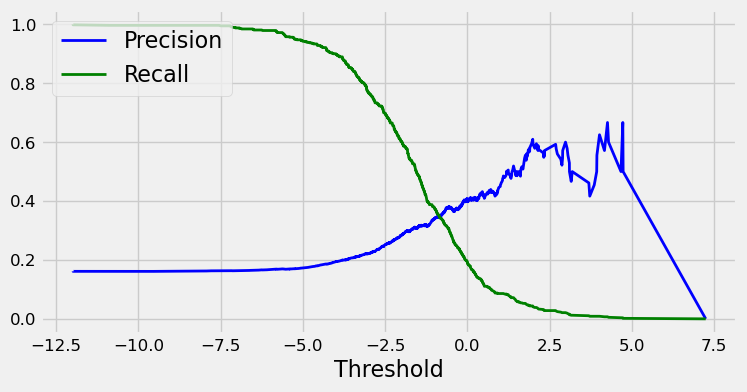

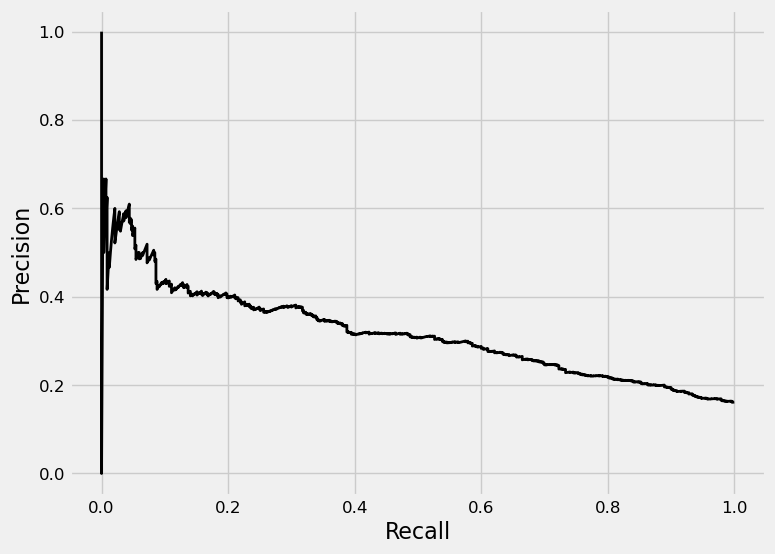

In [186]:
from sklearn.linear_model import SGDClassifier

# Créer un SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)

# Entraîner et évaluer le modèle
fpr_sdg, tpr_sdg, thresholds_sdg = display_scores(sgd_clf, X_train, y_train_yes, "decision_function")

Matrice de confusion :  [[2944   14]
 [ 194  376]]
Précision :  0.9641025641025641
Recall :  0.6596491228070176
F1-score :  0.7833333333333334
Accuracy :  0.9410430839002267


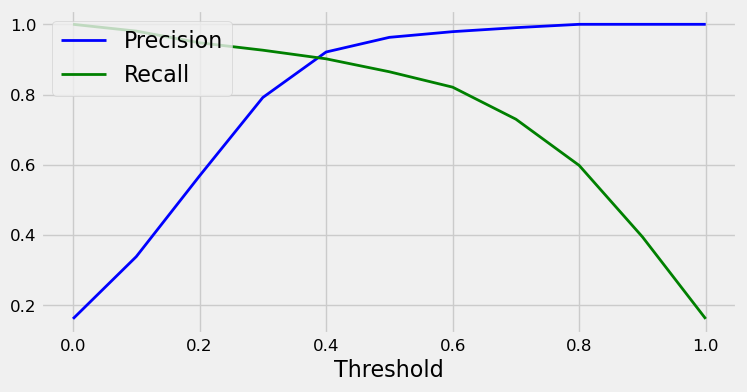

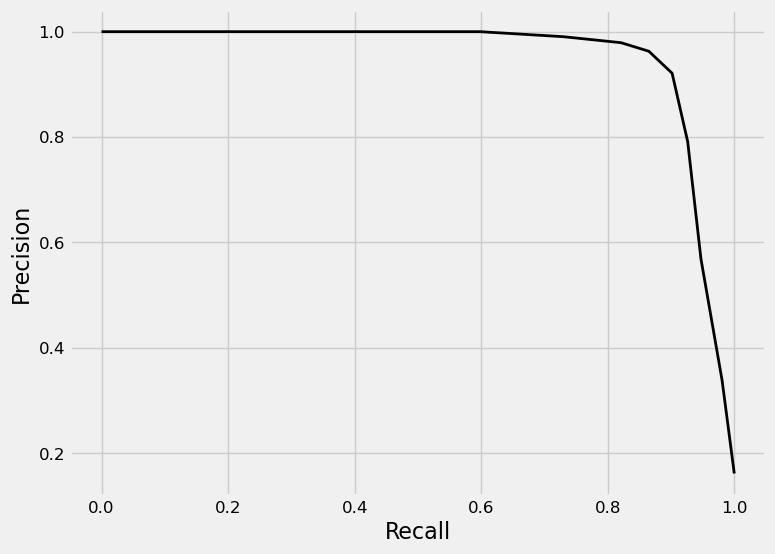

In [187]:
from sklearn.ensemble import RandomForestClassifier

# Créer un RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

# Entraîner et évaluer le modèle
fpr_clf, tpr_clf, thresholds_clf = display_scores(forest_clf, X_train, y_train_yes, "predict_proba")

Régression logistique

Matrice de confusion :  [[2879   79]
 [ 459  111]]
Précision :  0.5842105263157895
Recall :  0.19473684210526315
F1-score :  0.29210526315789476
Accuracy :  0.8475056689342404


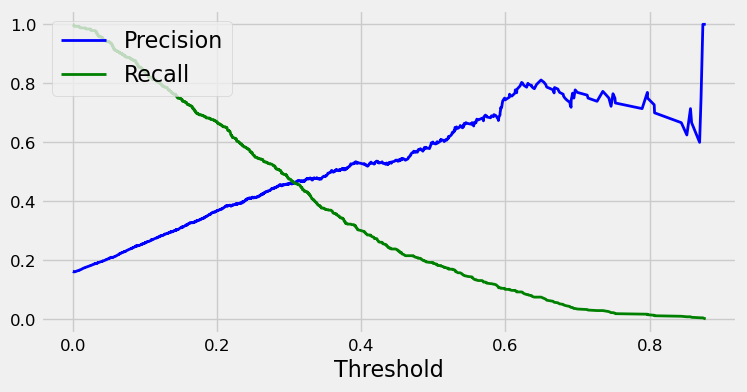

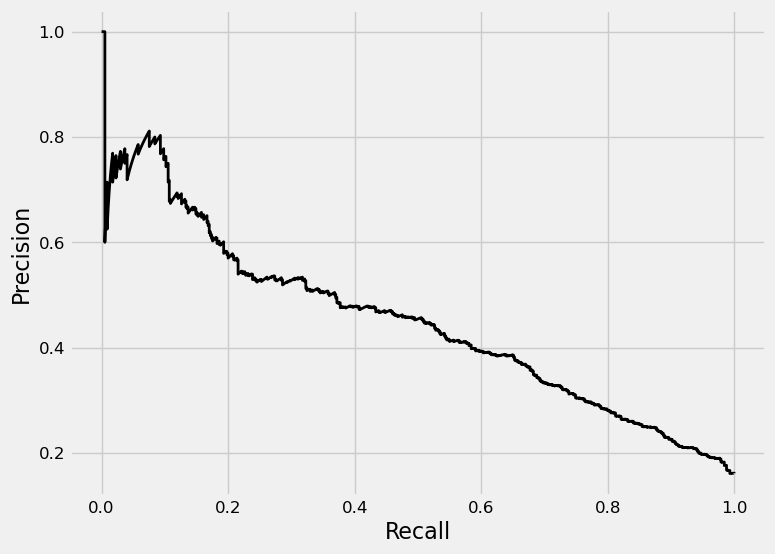

In [188]:
from sklearn.linear_model import LogisticRegression

# Créer une LogistiqueRegression
logisticRegr = LogisticRegression()

# Entraîner et évaluer le modèle
fpr_lgr, tpr_lgr, thresholds_lgr = display_scores(logisticRegr, X_train, y_train_yes, "predict_proba")

Voting

Matrice de confusion :  [[2944   14]
 [ 299  271]]
Précision :  0.9508771929824561
Recall :  0.47543859649122805
F1-score :  0.6339181286549707
Accuracy :  0.911281179138322


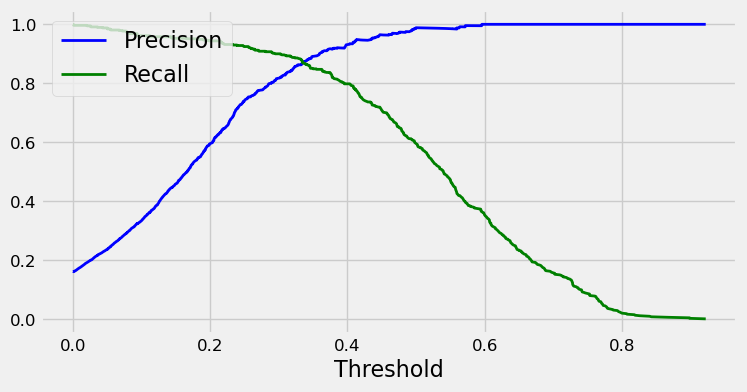

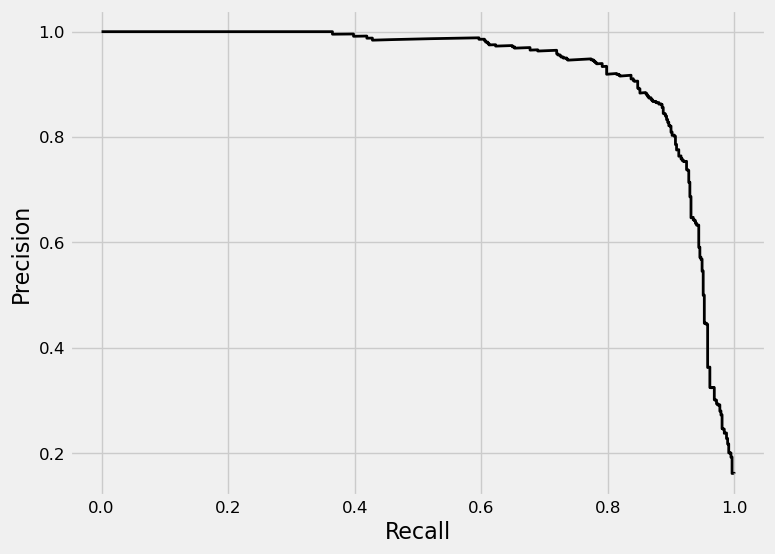

In [189]:
from sklearn.ensemble import  VotingClassifier

# Créer un RandomForestClassifier et un LogisticRegression
voting_forest = RandomForestClassifier(random_state=42, n_estimators=10)
voting_logisticRegr = LogisticRegression()

# Créer un VotingClassifier en mixant le RandomForestClassifier et la LogisticRegression
voting_clf = VotingClassifier(estimators=[('lr', voting_logisticRegr), ('rf', voting_forest)], voting='soft')

# Entraîner et évaluer le modèle
fpr_voting, tpr_voting, thresholds_voting = display_scores(voting_clf, X_train, y_train_yes, "predict_proba")

#### Comparer les modèles 
Courbe ROC

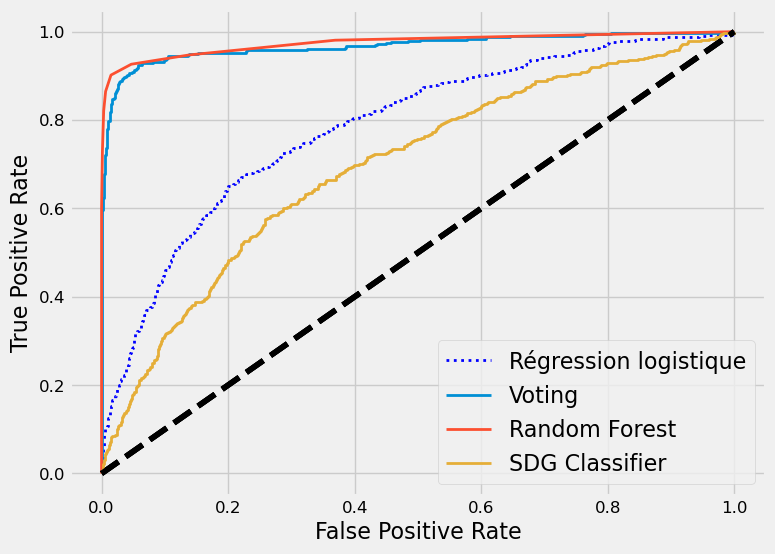

In [190]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Afficher le graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgr, tpr_lgr, "b:", linewidth=2, label="Régression logistique")
plot_roc_curve(fpr_voting, tpr_voting, "Voting")
plot_roc_curve(fpr_clf, tpr_clf, "Random Forest")
plot_roc_curve(fpr_sdg, tpr_sdg, "SDG Classifier")
plt.legend(loc="lower right", fontsize=16)
plt.show()

## Gridsearch
Utilisation de la méthode GridSearchCV afin de trouver les meilleurs hyperparamètres pour un modèle de régression RandomForestRegressor.

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Définir les paramètres
param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

# Créer un GridSearchCV
grid_search = GridSearchCV(forest_clf, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', verbose=1, n_jobs=-1)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train_yes)

# Afficher les meilleurs paramètres et la performance associée
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score de validation croisée : ", grid_search.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleurs paramètres :  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score de validation croisée :  0.9549319727891157


In [192]:
# Récupérer l'importance de chaque paramètre pour notre modèle
feature_importances = grid_search.best_estimator_.feature_importances_
# Afficher l'importance de chaque paramètre
sorted(zip(feature_importances, X.columns), reverse=True)

[(0.11793053887737655, 'MedianWorkingTime'),
 (0.08824045674372558, 'TotalWorkingYears'),
 (0.08159953369521665, 'MonthlyIncome'),
 (0.061596585944938324, 'YearsAtCompany'),
 (0.05971019662245857, 'DistanceFromHome'),
 (0.04955388139132412, 'PercentSalaryHike'),
 (0.046363283995023895, 'YearsWithCurrManager'),
 (0.04478223424917181, 'NumCompaniesWorked'),
 (0.03823389727179708, 'EnvironmentSatisfaction'),
 (0.03523611457989702, 'JobSatisfaction'),
 (0.03486337168726929, 'YearsSinceLastPromotion'),
 (0.03240693968255507, 'TrainingTimesLastYear'),
 (0.028839524184611817, 'JobLevel'),
 (0.028393097379622548, 'WorkLifeBalance'),
 (0.027867871756876175, 'Education'),
 (0.025611878278436605, 'JobInvolvement'),
 (0.023915875762008366, 'StockOptionLevel'),
 (0.020552628326112377, 'BusinessTravel'),
 (0.013238371428135018, 'EducationField_Life Sciences'),
 (0.011448254178817443, 'JobRole_Sales Executive'),
 (0.011247587238473626, 'EducationField_Medical'),
 (0.010841812840349699, 'Department_Sa

Text(0.5, 0, 'Relative Importance')

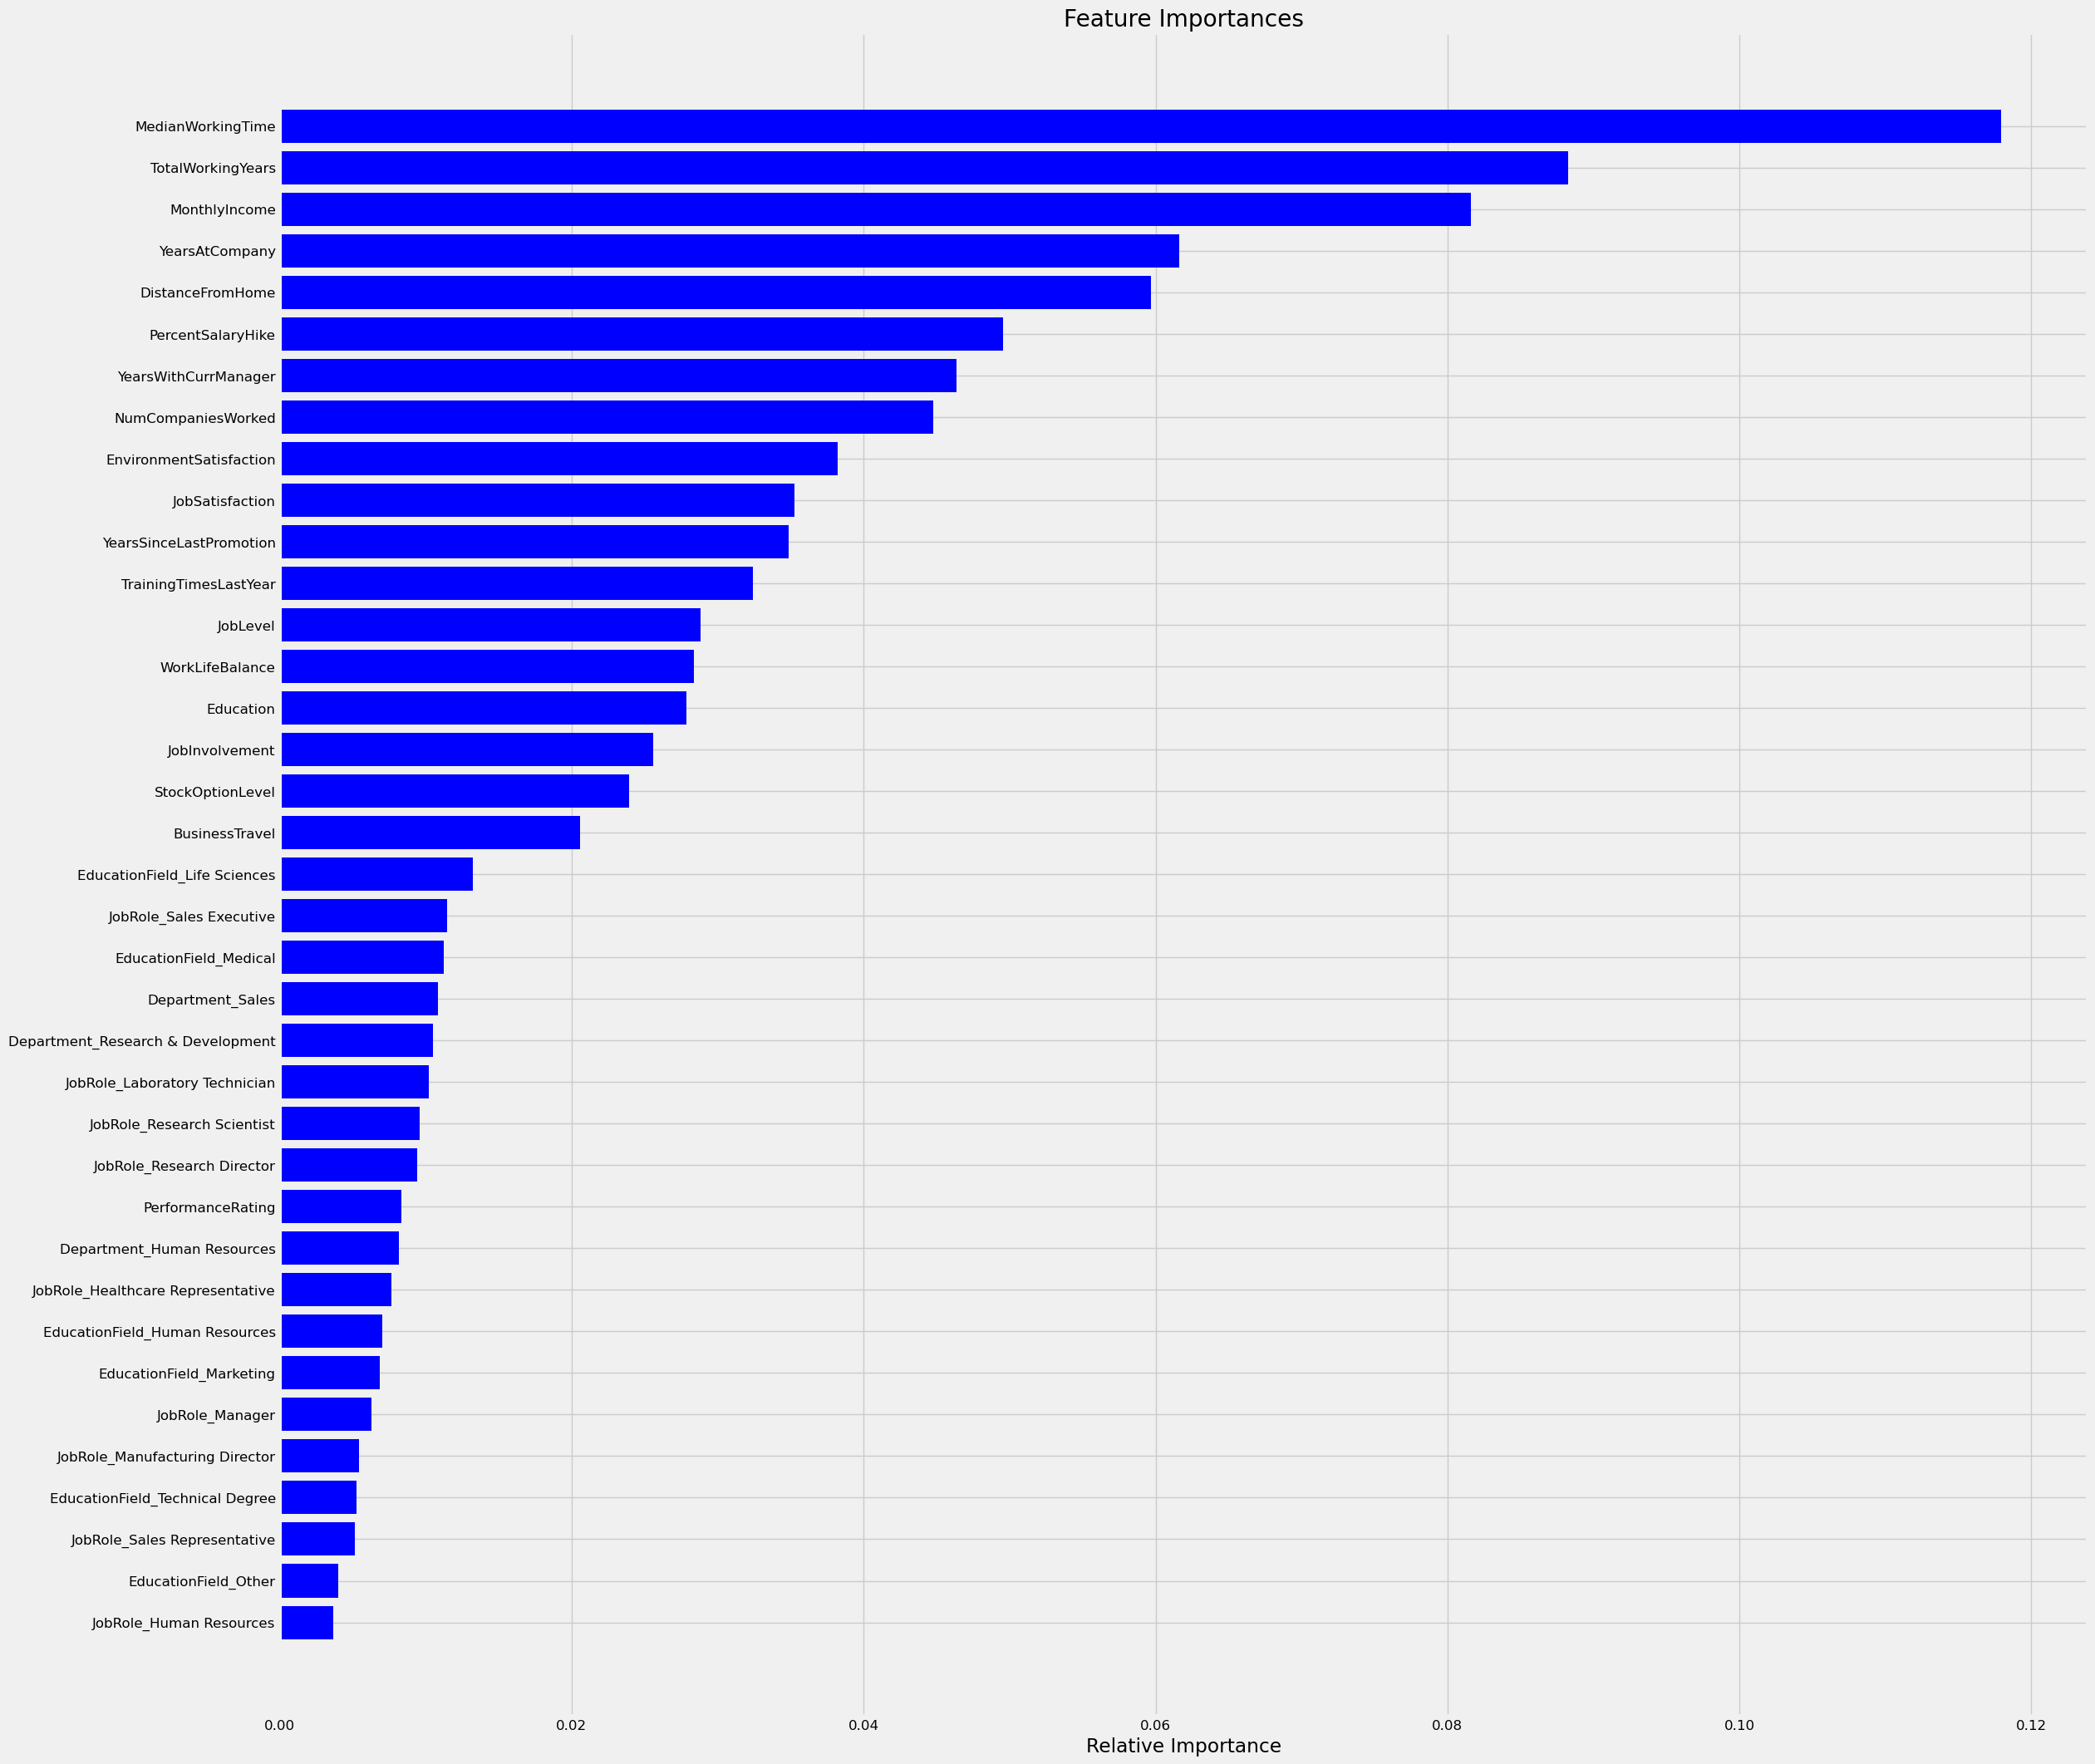

In [195]:
indices = np.argsort(feature_importances)

# Afficher le graphique
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(figsize=(25,25))

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')